# - 1 Download the Dataset
Download the fataset from the following link:
https://www.kaggle.com/moltean/fruits

# 2 -  Reading the Dataset
Read and prepare your dataset.
Divide your dataset into training and testing sets:
70% training set.
30% testing set.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#Import Keras libs and packages
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Dropout

# 3a Determine the image preprocessing

In [3]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255,shear_range=0.2,zoom_range=0.2,horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)

# 3b Initialize the training and test sets, resize

In [4]:
training_set = train_datagen.flow_from_directory('C:/Users/uriel/Downloads/fruits/fruits-360_dataset/fruits-360/Training',target_size=(100,100),batch_size=32,class_mode='categorical',shuffle=True)

Found 67692 images belonging to 131 classes.


In [5]:
#assing test set
test_set  = test_datagen.flow_from_directory('C:/Users/uriel/Downloads/fruits/fruits-360_dataset/fruits-360/Test',target_size=(100,100),batch_size=32,class_mode='categorical',shuffle=False)

Found 22688 images belonging to 131 classes.


# 4 Define Your Convolutional Neural Network
Define a CNN with the following layers:

The input layer is a 2-D convolutional layer with the following parameters:
16 units;
convolution window size: 2x2;
activation function: ReLU; and
input shape: 100x100x3

Define a 2D max pooling layer with pool size of 2x2.

Define a 2D convolutional layer with the following parameters:
32 units;
convolution window size: 2x2;
activation function: ReLU;

2-D max pooling layer with pool size of 2x2.

Define two 2-D convolutional layers, each with the following parameters:
64 units;
convolution window size: 2x2;
activation function: ReLU;

2D max pooling layer with pool size of 2x2;

Dropout layer with 0.3 rate; and

A flattening layer.

Define a fully-connected layer with:
150 units;
activation function: ReLU;

Dropout layer with a 0.4 rate.

The output layer is a fully connected layer with:
81 units and
activation function: softmax.

In [9]:
# Initialising the CNN
classifier = Sequential()

# 1 - Convolution
classifier.add(Conv2D(16, (2, 2), input_shape = (100, 100, 3), activation = 'relu'))

# 2 - Pooling
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# 3 - 2nd Convolution
classifier.add(Conv2D(32, (2, 2), activation = 'relu'))

# 4 - Max pooling
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# More convo layers
classifier.add(Conv2D(64, (2, 2), activation = 'relu'))
classifier.add(Conv2D(64, (2, 2), activation = 'relu'))

classifier.add(MaxPooling2D(pool_size = (2, 2)))
classifier.add(Dropout(0.3))

# Flattening
classifier.add(Flatten())

# Fully connected layer
classifier.add(Dense(units = 150, activation = 'relu'))
# Dropout layer
classifier.add(Dropout(0.4))

# Output Layer
classifier.add(Dense(units = 131, activation = 'softmax'))


# 4 Choosing Hyperparameters
Build the network using the following parameters:
-Optimizer: rmsprop
-Loss function: categorical_crossentropy
-Metrics: accuracy
-Batch size: 32
-Epochs: 30

In [10]:
# Compile the classifier model
classifier.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])


In [11]:
cnn = classifier.fit_generator(generator=training_set,steps_per_epoch=1000,epochs=30,validation_data=test_set,validation_steps=100)

Epoch 1/30


C:\Users\uriel\AppData\Local\Temp\ipykernel_8212\245854026.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  cnn = classifier.fit_generator(generator=training_set,steps_per_epoch=1000,epochs=30,validation_data=test_set,validation_steps=100)


1000/1000 [==============================] - 284s 283ms/step - loss: 2.1407 - accuracy: 0.4324 - val_loss: 0.7779 - val_accuracy: 0.7166
Epoch 2/30
1000/1000 [==============================] - 282s 282ms/step - loss: 0.5685 - accuracy: 0.8176 - val_loss: 0.4352 - val_accuracy: 0.8378
Epoch 3/30
1000/1000 [==============================] - 452s 452ms/step - loss: 0.3343 - accuracy: 0.8945 - val_loss: 0.4605 - val_accuracy: 0.8397
Epoch 4/30
1000/1000 [==============================] - 179s 179ms/step - loss: 0.2432 - accuracy: 0.9211 - val_loss: 0.3876 - val_accuracy: 0.8669
Epoch 5/30
1000/1000 [==============================] - 151s 151ms/step - loss: 0.1946 - accuracy: 0.9385 - val_loss: 0.1369 - val_accuracy: 0.9613
Epoch 6/30
1000/1000 [==============================] - 136s 136ms/step - loss: 0.1664 - accuracy: 0.9467 - val_loss: 0.5710 - val_accuracy: 0.8587
Epoch 7/30
1000/1000 [==============================] - 128s 128ms/step - loss: 0.1466 - accuracy: 0.9522 - val_loss: 0.457

Classificatin Metrics

In [12]:
cnn.history

{'loss': [2.140744686126709,
  0.5684697031974792,
  0.33433854579925537,
  0.24322561919689178,
  0.19463084638118744,
  0.16643457114696503,
  0.14659667015075684,
  0.13557663559913635,
  0.12790906429290771,
  0.11922148615121841,
  0.10901132225990295,
  0.10859597474336624,
  0.1020745262503624,
  0.09816636145114899,
  0.09867307543754578,
  0.08504093438386917,
  0.09170538187026978,
  0.08374147862195969,
  0.08080397546291351,
  0.08385800570249557,
  0.07990585267543793,
  0.07302850484848022,
  0.08373970538377762,
  0.0827835351228714,
  0.0764155238866806,
  0.07778739184141159,
  0.07688553631305695,
  0.07346531003713608,
  0.07598111778497696,
  0.07745367288589478],
 'accuracy': [0.4323750138282776,
  0.8175625205039978,
  0.8944652676582336,
  0.921075701713562,
  0.9384687542915344,
  0.9466854333877563,
  0.9522201418876648,
  0.9580675363540649,
  0.9597812294960022,
  0.9649999737739563,
  0.968093752861023,
  0.9691562652587891,
  0.9700312614440918,
  0.9701250

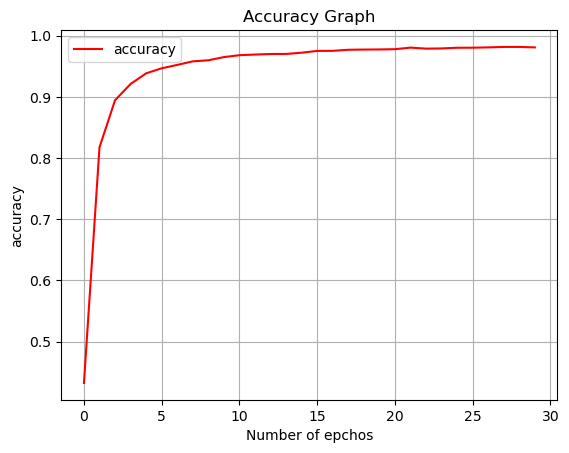

In [13]:
plt.plot(cnn.history["accuracy"],color="r",label="accuracy")
plt.title("Accuracy Graph")
plt.xlabel("Number of epchos")
plt.ylabel("accuracy")
plt.legend()
plt.grid()
plt.show()

In [14]:
test_labels = test_set.labels

In [15]:
predictions = classifier.predict(test_set)

709/709 [==============================] - 149s 210ms/step


In [16]:
import numpy as np
predict_labels = np.argmax(predictions, axis=-1)

from sklearn.metrics import confusion_matrix
np.set_printoptions(threshold = np.inf)
print("Confusion Matrix: \n", confusion_matrix(test_labels,predict_labels))

Confusion Matrix: 
 [[128   0   0   0   0   0   0   0   2   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  34   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0]
 [  0 148   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0